#### Data Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/aps_failure_set.csv'
data_df = pd.read_csv(file_path)
data_df.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


#### Data Types and Missing Values

In [2]:
corrupt_values = ["NA", "N/A", "-", "NaN", "missing", "na", "?"]
data_df = pd.read_csv('data/aps_failure_set.csv', na_values=corrupt_values)
missing_values = data_df.isnull().sum()
data_df = data_df.fillna(np.nan)
data_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


#### Exploratory Data Analysis (EDA) 

##### Visualization
###### Creating "My Report" useful to understand the data and create various visualizations to better decide how to handle the missing data, outliers, and constant abservations. 

In [3]:
# from ydata_profiling import ProfileReport
# slice_data_df = data_df.iloc[:, :10]
# report = ProfileReport(data_df, title='My Data', minimal=True)
# report.to_file("my_report.html")

##### Handle Missing Values
###### I proceeded to handle the missing values: For features with a percentage more than 30% of missing values I used the mean.

In [4]:
numerical_columns = data_df.select_dtypes(include=['number']).columns
missing_threshold = 0.30
for col in numerical_columns:
    missing_percentage = data_df[col].isnull().mean() * 100
    
    if missing_percentage < missing_threshold:
        data_df[col].fillna(data_df[col].mean(), inplace=True)
    else:
        data_df[col].fillna(data_df[col].median(), inplace=True)

#### Remove Constant Observations
###### The Report I created showed me I have a constant Column cd_000 which I proceed to drop off

In [5]:
data_df = data_df.drop("cd_000", axis=1)

##### Outliers Detection
###### Detecting 3 observations with outliers thanks to My Report Histograms and visualise them also with a bloxplot

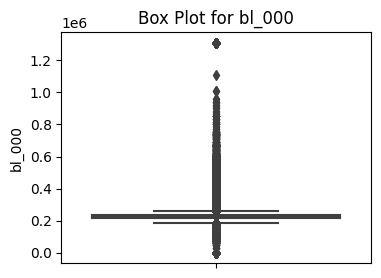

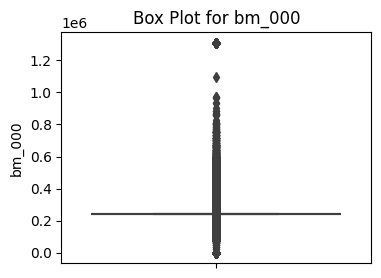

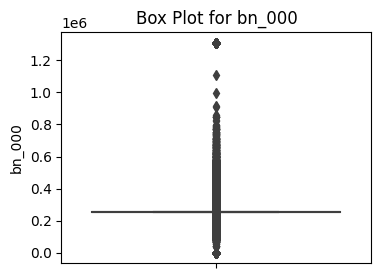

In [6]:
outliers = ['bl_000', 'bm_000', 'bn_000']

for col in outliers:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=data_df, y=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

#### PCA


###### For educational purposes, I have chosen to identify and changing them with the mean for all of those features which had more than 20% of missing values. This choice aims to simplify the exercise and avoid excessive complexity. After that, I replaced ["class"] with a numerical class and I processed the Explained Variance vs. Number of Components PCA.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
data_df["class"] = l_encoder.fit_transform(data_df["class"])
data_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Text(0.5, 1.0, 'Explained Variance vs. Number of Components')

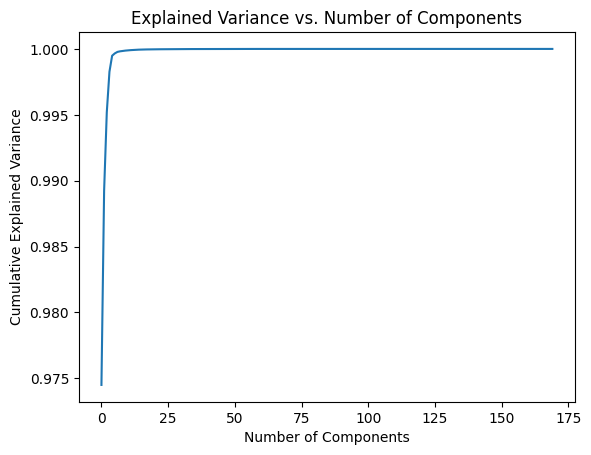

In [8]:
pca= PCA().fit(data_df.drop(data_df["class"]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')

In [12]:
pca= PCA(4)
projected = pca.fit_transform(data_df.drop(data_df["class"]))
projected.shape

(59998, 4)

In [14]:
data_pca = pd.DataFrame(projected, columns = ["C1","C2","C3","C4"])
data_pca["class"] = data_df["class"]
data_pca.head()

,C1,C2,C3,C4,class
0,-3.361677e+08,-5.627310e+06,-276672.146137,-1.032390e+07,0
1,-3.361448e+08,-6.271497e+06,-262928.086127,-1.485091e+07,0
2,-3.362207e+08,-4.904904e+06,-310157.909343,1.001999e+07,0
3,1.794542e+09,-6.490103e+05,7385.698774,-4.604742e+06,0
4,-3.361447e+08,-6.254154e+06,-263299.722945,-1.477674e+07,0


#### Curse of Dimensionality


#### Conlcusions


#### References